In [1]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')



In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

trainCopy = train.copy()
testCopy = test.copy()



<AxesSubplot:>

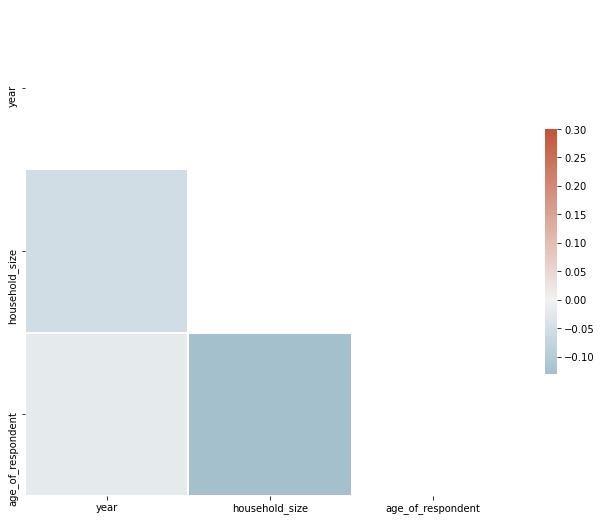

In [3]:
#lets check on correlation
#correlation heatmap 
# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [4]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
train['age_of_respondent'] = np.where(train['age_of_respondent'] >71.0 ,30.0 ,train['age_of_respondent'])
test['age_of_respondent'] = np.where(test['age_of_respondent'] >70.0 ,30.0 ,test['age_of_respondent'])



In [6]:
train['household_size'] = np.where(train['household_size'] >8.0 ,2.0 ,train['household_size'])
test['household_size'] = np.where(test['household_size'] >8.0 ,2.0 ,test['household_size'])



In [7]:
#lets create bins  
train['ageBins']=pd.qcut(train['age_of_respondent'], q=4, labels=False)

In [8]:
test['ageBins']=pd.qcut(test['age_of_respondent'], q=4,labels=False)

In [9]:
## labelbinarizer and onehot encoder 
from sklearn.preprocessing import LabelBinarizer,OneHotEncoder 

lb = LabelBinarizer()
ohe = OneHotEncoder()


train['bank_account']=lb.fit_transform(train['bank_account'])
train['location_type']= lb.fit_transform(train['location_type'])
train['cellphone_access']=lb.fit_transform(train['cellphone_access'])
train['gender_of_respondent'] = lb.fit_transform(train['gender_of_respondent'])



test['location_type']= lb.fit_transform(test['location_type'])
test['cellphone_access']=lb.fit_transform(test['cellphone_access'])
test['gender_of_respondent'] = lb.fit_transform(test['gender_of_respondent'])

In [10]:
train['household_size'].value_counts()

2.0    5973
3.0    3920
4.0    3474
1.0    3057
5.0    2853
6.0    2096
7.0    1400
8.0     751
Name: household_size, dtype: int64

In [11]:
test['houseHoldBins']=pd.qcut(test['household_size'], q=4 ,labels=False)

train['houseHoldBins']=pd.qcut(train['household_size'], q=4,labels=False)

In [12]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,ageBins,houseHoldBins
0,Kenya,2018,uniqueid_1,1,0,1,3.0,24.0,0,Spouse,Married/Living together,Secondary education,Self employed,0,1
1,Kenya,2018,uniqueid_2,0,0,0,5.0,70.0,0,Head of Household,Widowed,No formal education,Government Dependent,3,2
2,Kenya,2018,uniqueid_3,1,1,1,5.0,26.0,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,0,2
3,Kenya,2018,uniqueid_4,0,0,1,5.0,34.0,0,Head of Household,Married/Living together,Primary education,Formally employed Private,2,2
4,Kenya,2018,uniqueid_5,0,1,0,8.0,26.0,1,Child,Single/Never Married,Primary education,Informally employed,0,3


In [13]:
train.describe(include=['object'])

,country,uniqueid,relationship_with_head,marital_status,education_level,job_type
count,23524,23524,23524,23524,23524,23524
unique,4,8735,6,5,6,10
top,Rwanda,uniqueid_2095,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,4,12831,10749,12791,6437


In [14]:
trainId =train['uniqueid']
testCountry = test['country']

testId =test['uniqueid']
y = train['bank_account']

X = train.drop(['uniqueid','bank_account'],axis=1)
Xx =test.drop(['uniqueid'],axis=1)

In [15]:
X1 = pd.get_dummies(X)
Xx1 = pd.get_dummies(Xx)

print(X1.shape)
print(Xx1.shape)

(23524, 39)
(10086, 39)


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X1,y,random_state=23,test_size=0.25)

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
import scikitplot as skplt
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.svm import SVC

In [18]:
mlp = MLPClassifier()
adc = AdaBoostClassifier()
etc= ExtraTreesClassifier()
gbc =GradientBoostingClassifier()
rfc =RandomForestClassifier()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
lr = LogisticRegression()
lgbc = lgb.LGBMClassifier()
cbc = CatBoostClassifier()
xgbc =XGBClassifier(objective="binary:logistic")

estimators = [('MLPClassifier',mlp),
              ('AdaBoostClassifier',adc),
              ('ExtraTreesClassifier',etc),
              ('GradientBoostingClassifier',gbc),
              ('RandomForestClassifier',rfc),
              ('KNeighborsClassifier',knn),
              ('DecisionTreeClassifier',dtc),
              ('LogisticRegression',lr),
              ('XGBClassifier',xgbc),
              ('LightGBMClassifier',lgbc),
              ('CatBoostClassifier',cbc)]

In [19]:
def model_training(X_train,X_test,y_train,y_test):
    for e,r in estimators:
        r.fit(X_train,y_train)
        r_preds = r.predict(X_test)
        print("*****************************************************")
        print("Accuracy score for {} is :".format(e),accuracy_score(y_test,r_preds))
        print("AUC score for {} is: ".format(e),auc(y_test,r_preds))
        print("The precision score for {} is :".format(e),precision_score(y_test, r_preds))
        
        print("*****************************************************")
        print("\n")
        


In [20]:
model_training(X_train,X_test,y_train,y_test)

*****************************************************
Accuracy score for MLPClassifier is : 0.859377656861078
AUC score for MLPClassifier is:  0.5342081766885199
The precision score for MLPClassifier is : 0.8493150684931506
*****************************************************


*****************************************************
Accuracy score for AdaBoostClassifier is : 0.8770617241965653
AUC score for AdaBoostClassifier is:  0.6535343031083399
The precision score for AdaBoostClassifier is : 0.6789838337182448
*****************************************************


*****************************************************
Accuracy score for ExtraTreesClassifier is : 0.8457745281414726
AUC score for ExtraTreesClassifier is:  0.6609698190197498
The precision score for ExtraTreesClassifier is : 0.48005502063273725
*****************************************************


*****************************************************
Accuracy score for GradientBoostingClassifier is : 0.88114266281244

98:	learn: 0.2724774	total: 1.39s	remaining: 12.7s
99:	learn: 0.2723549	total: 1.41s	remaining: 12.7s
100:	learn: 0.2720864	total: 1.42s	remaining: 12.7s
101:	learn: 0.2718314	total: 1.43s	remaining: 12.6s
102:	learn: 0.2715988	total: 1.45s	remaining: 12.6s
103:	learn: 0.2713764	total: 1.46s	remaining: 12.6s
104:	learn: 0.2711045	total: 1.47s	remaining: 12.6s
105:	learn: 0.2708042	total: 1.52s	remaining: 12.8s
106:	learn: 0.2705801	total: 1.56s	remaining: 13s
107:	learn: 0.2704528	total: 1.57s	remaining: 13s
108:	learn: 0.2702693	total: 1.58s	remaining: 12.9s
109:	learn: 0.2701670	total: 1.59s	remaining: 12.9s
110:	learn: 0.2700448	total: 1.6s	remaining: 12.8s
111:	learn: 0.2698609	total: 1.61s	remaining: 12.8s
112:	learn: 0.2696952	total: 1.62s	remaining: 12.7s
113:	learn: 0.2695179	total: 1.63s	remaining: 12.7s
114:	learn: 0.2693575	total: 1.64s	remaining: 12.6s
115:	learn: 0.2692138	total: 1.65s	remaining: 12.6s
116:	learn: 0.2690469	total: 1.66s	remaining: 12.5s
117:	learn: 0.26885

267:	learn: 0.2545201	total: 3.16s	remaining: 8.62s
268:	learn: 0.2544329	total: 3.17s	remaining: 8.6s
269:	learn: 0.2543585	total: 3.18s	remaining: 8.6s
270:	learn: 0.2543210	total: 3.19s	remaining: 8.57s
271:	learn: 0.2542821	total: 3.2s	remaining: 8.55s
272:	learn: 0.2542465	total: 3.2s	remaining: 8.53s
273:	learn: 0.2541635	total: 3.21s	remaining: 8.51s
274:	learn: 0.2541287	total: 3.22s	remaining: 8.49s
275:	learn: 0.2540265	total: 3.23s	remaining: 8.47s
276:	learn: 0.2539023	total: 3.24s	remaining: 8.45s
277:	learn: 0.2538038	total: 3.25s	remaining: 8.43s
278:	learn: 0.2537065	total: 3.25s	remaining: 8.41s
279:	learn: 0.2536602	total: 3.26s	remaining: 8.39s
280:	learn: 0.2536211	total: 3.27s	remaining: 8.38s
281:	learn: 0.2535477	total: 3.28s	remaining: 8.35s
282:	learn: 0.2535031	total: 3.29s	remaining: 8.33s
283:	learn: 0.2534386	total: 3.3s	remaining: 8.31s
284:	learn: 0.2533197	total: 3.31s	remaining: 8.29s
285:	learn: 0.2531868	total: 3.31s	remaining: 8.27s
286:	learn: 0.253

433:	learn: 0.2429742	total: 4.58s	remaining: 5.97s
434:	learn: 0.2429227	total: 4.59s	remaining: 5.96s
435:	learn: 0.2428834	total: 4.6s	remaining: 5.95s
436:	learn: 0.2428198	total: 4.61s	remaining: 5.94s
437:	learn: 0.2427464	total: 4.62s	remaining: 5.93s
438:	learn: 0.2426886	total: 4.63s	remaining: 5.91s
439:	learn: 0.2426229	total: 4.64s	remaining: 5.9s
440:	learn: 0.2425752	total: 4.64s	remaining: 5.89s
441:	learn: 0.2425176	total: 4.66s	remaining: 5.88s
442:	learn: 0.2424477	total: 4.66s	remaining: 5.86s
443:	learn: 0.2423790	total: 4.67s	remaining: 5.85s
444:	learn: 0.2423457	total: 4.68s	remaining: 5.84s
445:	learn: 0.2423128	total: 4.69s	remaining: 5.82s
446:	learn: 0.2422285	total: 4.71s	remaining: 5.82s
447:	learn: 0.2421630	total: 4.71s	remaining: 5.81s
448:	learn: 0.2421175	total: 4.72s	remaining: 5.8s
449:	learn: 0.2420656	total: 4.73s	remaining: 5.79s
450:	learn: 0.2420082	total: 4.74s	remaining: 5.78s
451:	learn: 0.2419486	total: 4.75s	remaining: 5.76s
452:	learn: 0.2

601:	learn: 0.2343067	total: 6s	remaining: 3.97s
602:	learn: 0.2342680	total: 6.01s	remaining: 3.96s
603:	learn: 0.2342329	total: 6.02s	remaining: 3.95s
604:	learn: 0.2342020	total: 6.03s	remaining: 3.93s
605:	learn: 0.2341341	total: 6.03s	remaining: 3.92s
606:	learn: 0.2340626	total: 6.04s	remaining: 3.91s
607:	learn: 0.2340362	total: 6.05s	remaining: 3.9s
608:	learn: 0.2340083	total: 6.06s	remaining: 3.89s
609:	learn: 0.2339530	total: 6.06s	remaining: 3.88s
610:	learn: 0.2339038	total: 6.07s	remaining: 3.87s
611:	learn: 0.2338667	total: 6.08s	remaining: 3.85s
612:	learn: 0.2337965	total: 6.09s	remaining: 3.84s
613:	learn: 0.2337508	total: 6.09s	remaining: 3.83s
614:	learn: 0.2336782	total: 6.1s	remaining: 3.82s
615:	learn: 0.2336449	total: 6.11s	remaining: 3.81s
616:	learn: 0.2336168	total: 6.12s	remaining: 3.8s
617:	learn: 0.2335684	total: 6.13s	remaining: 3.79s
618:	learn: 0.2335126	total: 6.13s	remaining: 3.77s
619:	learn: 0.2334381	total: 6.14s	remaining: 3.76s
620:	learn: 0.2333

779:	learn: 0.2264789	total: 7.43s	remaining: 2.09s
780:	learn: 0.2264420	total: 7.43s	remaining: 2.08s
781:	learn: 0.2263985	total: 7.44s	remaining: 2.07s
782:	learn: 0.2263552	total: 7.45s	remaining: 2.06s
783:	learn: 0.2263331	total: 7.46s	remaining: 2.05s
784:	learn: 0.2263084	total: 7.46s	remaining: 2.04s
785:	learn: 0.2262753	total: 7.47s	remaining: 2.03s
786:	learn: 0.2262295	total: 7.48s	remaining: 2.02s
787:	learn: 0.2261943	total: 7.49s	remaining: 2.01s
788:	learn: 0.2261655	total: 7.49s	remaining: 2s
789:	learn: 0.2261450	total: 7.5s	remaining: 1.99s
790:	learn: 0.2261080	total: 7.51s	remaining: 1.98s
791:	learn: 0.2260719	total: 7.51s	remaining: 1.97s
792:	learn: 0.2260540	total: 7.52s	remaining: 1.96s
793:	learn: 0.2260018	total: 7.53s	remaining: 1.95s
794:	learn: 0.2259647	total: 7.53s	remaining: 1.94s
795:	learn: 0.2259148	total: 7.54s	remaining: 1.93s
796:	learn: 0.2258308	total: 7.55s	remaining: 1.92s
797:	learn: 0.2257946	total: 7.56s	remaining: 1.91s
798:	learn: 0.22

947:	learn: 0.2200877	total: 8.67s	remaining: 476ms
948:	learn: 0.2200219	total: 8.68s	remaining: 466ms
949:	learn: 0.2199892	total: 8.68s	remaining: 457ms
950:	learn: 0.2199602	total: 8.69s	remaining: 448ms
951:	learn: 0.2199109	total: 8.7s	remaining: 439ms
952:	learn: 0.2198873	total: 8.71s	remaining: 429ms
953:	learn: 0.2198593	total: 8.71s	remaining: 420ms
954:	learn: 0.2198425	total: 8.72s	remaining: 411ms
955:	learn: 0.2197996	total: 8.73s	remaining: 402ms
956:	learn: 0.2197556	total: 8.74s	remaining: 393ms
957:	learn: 0.2197188	total: 8.74s	remaining: 383ms
958:	learn: 0.2196912	total: 8.75s	remaining: 374ms
959:	learn: 0.2196785	total: 8.76s	remaining: 365ms
960:	learn: 0.2196224	total: 8.77s	remaining: 356ms
961:	learn: 0.2196045	total: 8.77s	remaining: 347ms
962:	learn: 0.2195675	total: 8.78s	remaining: 337ms
963:	learn: 0.2195084	total: 8.79s	remaining: 328ms
964:	learn: 0.2194842	total: 8.79s	remaining: 319ms
965:	learn: 0.2194241	total: 8.8s	remaining: 310ms
966:	learn: 0.

In [21]:
svm =SVC()
svm.fit(X_train,y_train)
svm_preds = svm.predict(X_test)
print("Accuracy score is :",accuracy_score(y_test,svm_preds))
print("AUC score is: ",auc(y_test,svm_preds))
print("The precision score  is :",precision_score(y_test, svm_preds))
        

Accuracy score is : 0.8507056623023296
AUC score is:  0.5
The precision score  is : 0.0


In [22]:
##Logistic Regression
# defining parameter range 
from sklearn.model_selection import GridSearchCV 
param_grid = {'C': np.arange(1,11)}  
  
grid = GridSearchCV(lr, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 



# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................. C=1, score=0.880, total=   0.3s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ................................. C=1, score=0.887, total=   0.3s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ................................. C=1, score=0.885, total=   0.3s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.900, total=   0.3s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.883, total=   0.3s
[CV] C=2 .............................................................
[CV] ................................. C=2, score=0.881, total=   0.3s
[CV] C=2 .............................................................
[CV] ................................. C=2, score=0.887, total=   0.4s
[CV] C=2 .............................................................
[CV] ................................. C=2, score=0.884, total=   0.3s
[CV] C=2 .............................................................
[CV] ................................. C=2, score=0.899, total=   0.3s
[CV] C=2 .............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   16.4s finished


{'C': 3}
LogisticRegression(C=3)


In [23]:
xggg =XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)


xggg.fit(X_train,y_train)
xg_preds = xggg.predict(X_test)
print("Accuracy score is :",accuracy_score(y_test,xg_preds))
print("AUC score is: ",auc(y_test,xg_preds))
print("The precision score  is :",precision_score(y_test, xg_preds))

[20:03:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score is : 0.8804625063764666
AUC score is:  0.6639847526563789
The precision score  is : 0.6948775055679287


In [24]:
svm =SVC(C =100, gamma=0.01, kernel ='rbf')
svm.fit(X_train,y_train)
svm_preds = svm.predict(X_test)
print("Accuracy score is :",accuracy_score(y_test,svm_preds))
print("AUC score is: ",auc(y_test,svm_preds))
print("The precision score  is :",precision_score(y_test, svm_preds))
        

Accuracy score is : 0.87655160686958
AUC score is:  0.6433742260338557
The precision score  is : 0.6928934010152284


In [25]:
lr =LogisticRegression(C=3)
lr.fit(X_train,y_train)
lr_preds = lr.predict(X_test)
print("Accuracy score is :",accuracy_score(y_test,lr_preds))
print("AUC score is: ",auc(y_test,lr_preds))
print("The precision score  is :",precision_score(y_test, lr_preds))

Accuracy score is : 0.876381567760585
AUC score is:  0.6540736150564787
The precision score  is : 0.671201814058957


In [26]:
#min_child_samples=100, min_child_weight=1e-05, num_leaves=21, reg_alpha=5, reg_lambda=100
lgbcc =lgb.LGBMClassifier(min_child_samples=150,
                          min_child_weight=1e-05, 
                          num_leaves=40, 
                          reg_alpha=5, 
                          reg_lambda=100,
                          learning_rate=0.1)

lgbcc.fit(X_train,y_train)
lgbc_preds = lgbcc.predict(X_test)
print("Accuracy score is :",accuracy_score(y_test,lgbc_preds))
print("AUC score is: ",auc(y_test,lgbc_preds))
print("The precision score  is :",precision_score(y_test, lgbc_preds))

Accuracy score is : 0.8802924672674716
AUC score is:  0.6596589882061651
The precision score  is : 0.7013888888888888


In [27]:
predss = lgbcc.predict(Xx1)

In [28]:
#convert the predictions to pandas dataframe
submission = pd.DataFrame(data={'uniqueid':testId+' x '+ testCountry,'bank_account':predss})

submission.to_csv('Submission.csv',index=False)
                          
